# Libraries

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Citation
@misc{fabio_mendoza_palechor_,
	alexis de la hoz manotas_2023,
	title={Obesity or CVD risk (Classify/Regressor/Cluster)},
	url={https://www.kaggle.com/dsv/7009925},
	DOI={10.34740/KAGGLE/DSV/7009925},
	publisher={Kaggle},
	author={Fabio Mendoza Palechor and,
	Alexis de la Hoz Manotas},
	year={2023}
}

In [259]:
train_dataset = pd.read_csv("ObesityDataSet.csv")

In [260]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [261]:
train_dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Attributes
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

Other attributes are Gender, Age, Height and Weight.

In [262]:
print ("Elements in train_dataset for 'CAEC'",list(train_dataset["CAEC"].unique()))
print ("Elements in train_dataset for 'CALC'",list(train_dataset["CALC"].unique()))
print ("Elements in train_dataset for 'MTRANS'",list(train_dataset["MTRANS"].unique()))

Elements in train_dataset for 'CAEC' ['Sometimes', 'Frequently', 'Always', 'no']
Elements in train_dataset for 'CALC' ['no', 'Sometimes', 'Frequently', 'Always']
Elements in train_dataset for 'MTRANS' ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']


In [263]:
def make_category(df):
    df["SMOKE"] = (df.SMOKE == "yes").astype(bool)
    df["family_history_with_overweight"] = (df.family_history_with_overweight == "yes").astype(bool)
    df["FAVC"] = (df.FAVC == "yes").astype(bool)
    df["SCC"] = (df.SCC == "yes").astype(bool)
    df["Gender"] = (df.Gender == "Male").astype(bool)

make_category(train_dataset)
train_dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,21.0,1.62,64.0,True,False,2.0,3.0,Sometimes,False,2.0,False,0.0,1.0,no,Public_Transportation,Normal_Weight
1,False,21.0,1.52,56.0,True,False,3.0,3.0,Sometimes,True,3.0,True,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,True,23.0,1.80,77.0,True,False,2.0,3.0,Sometimes,False,2.0,False,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,True,27.0,1.80,87.0,False,False,3.0,3.0,Sometimes,False,2.0,False,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,True,22.0,1.78,89.8,False,False,2.0,1.0,Sometimes,False,2.0,False,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Data Visualization

In [264]:
TARGET = "NObeyesdad"
num_cols = list(train_dataset.select_dtypes("float").columns) 
cat_cols = list(train_dataset.columns.drop(num_cols+[TARGET]))

full_form = dict({'FAVC' : "Frequency of consumption of high caloric food",
                  'FCVC' : "Frequency of consumption of vegetables",
                  'NCP' :"Number of main meal",
                  'CAEC': "Consumption of food between meals",
                  'CH2O': "Consumption of water daily",
                  'CALC': "Consumption of alcohol" ,
                  'SCC':  "Calories consumption monitoring",
                  'FAF': "Physical activity frequency",
                  'TUE': "Time using technology devices",
                  'MTRANS' : "Transportation used"})

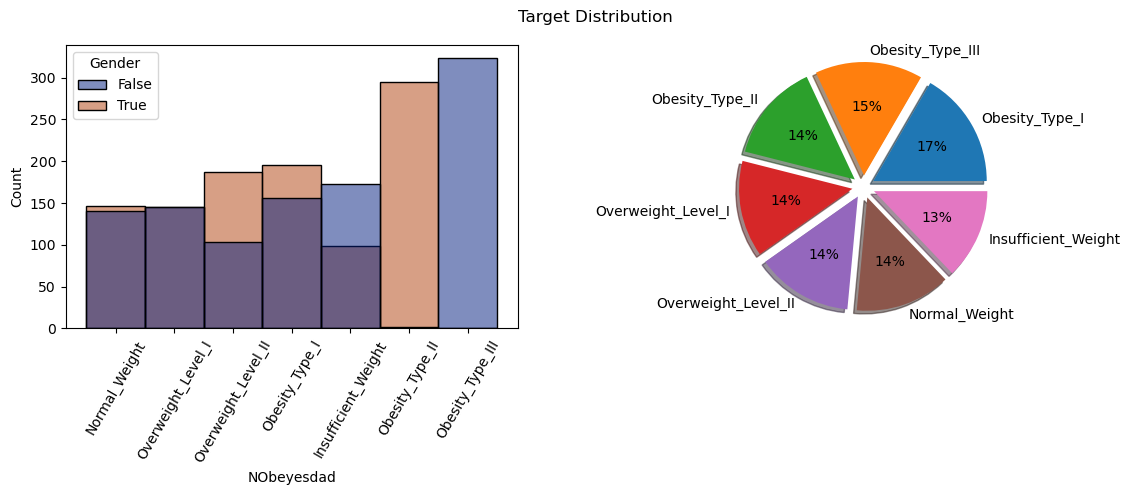

In [265]:
fig, axs = plt.subplots(1,2,figsize = (12,5))
plt.suptitle("Target Distribution")

sns.histplot(binwidth=0.5,x=TARGET,data=train_dataset,hue='Gender',palette="dark",ax=axs[0],discrete=True)
axs[0].tick_params(axis='x', rotation=60)

axs[1].pie(
        train_dataset[TARGET].value_counts(),
        shadow = True,
        explode=[.1 for i in range(train_dataset[TARGET].nunique())],
        labels = train_dataset[TARGET].value_counts().index,
        autopct='%1.f%%',
    )

plt.tight_layout()
plt.show()

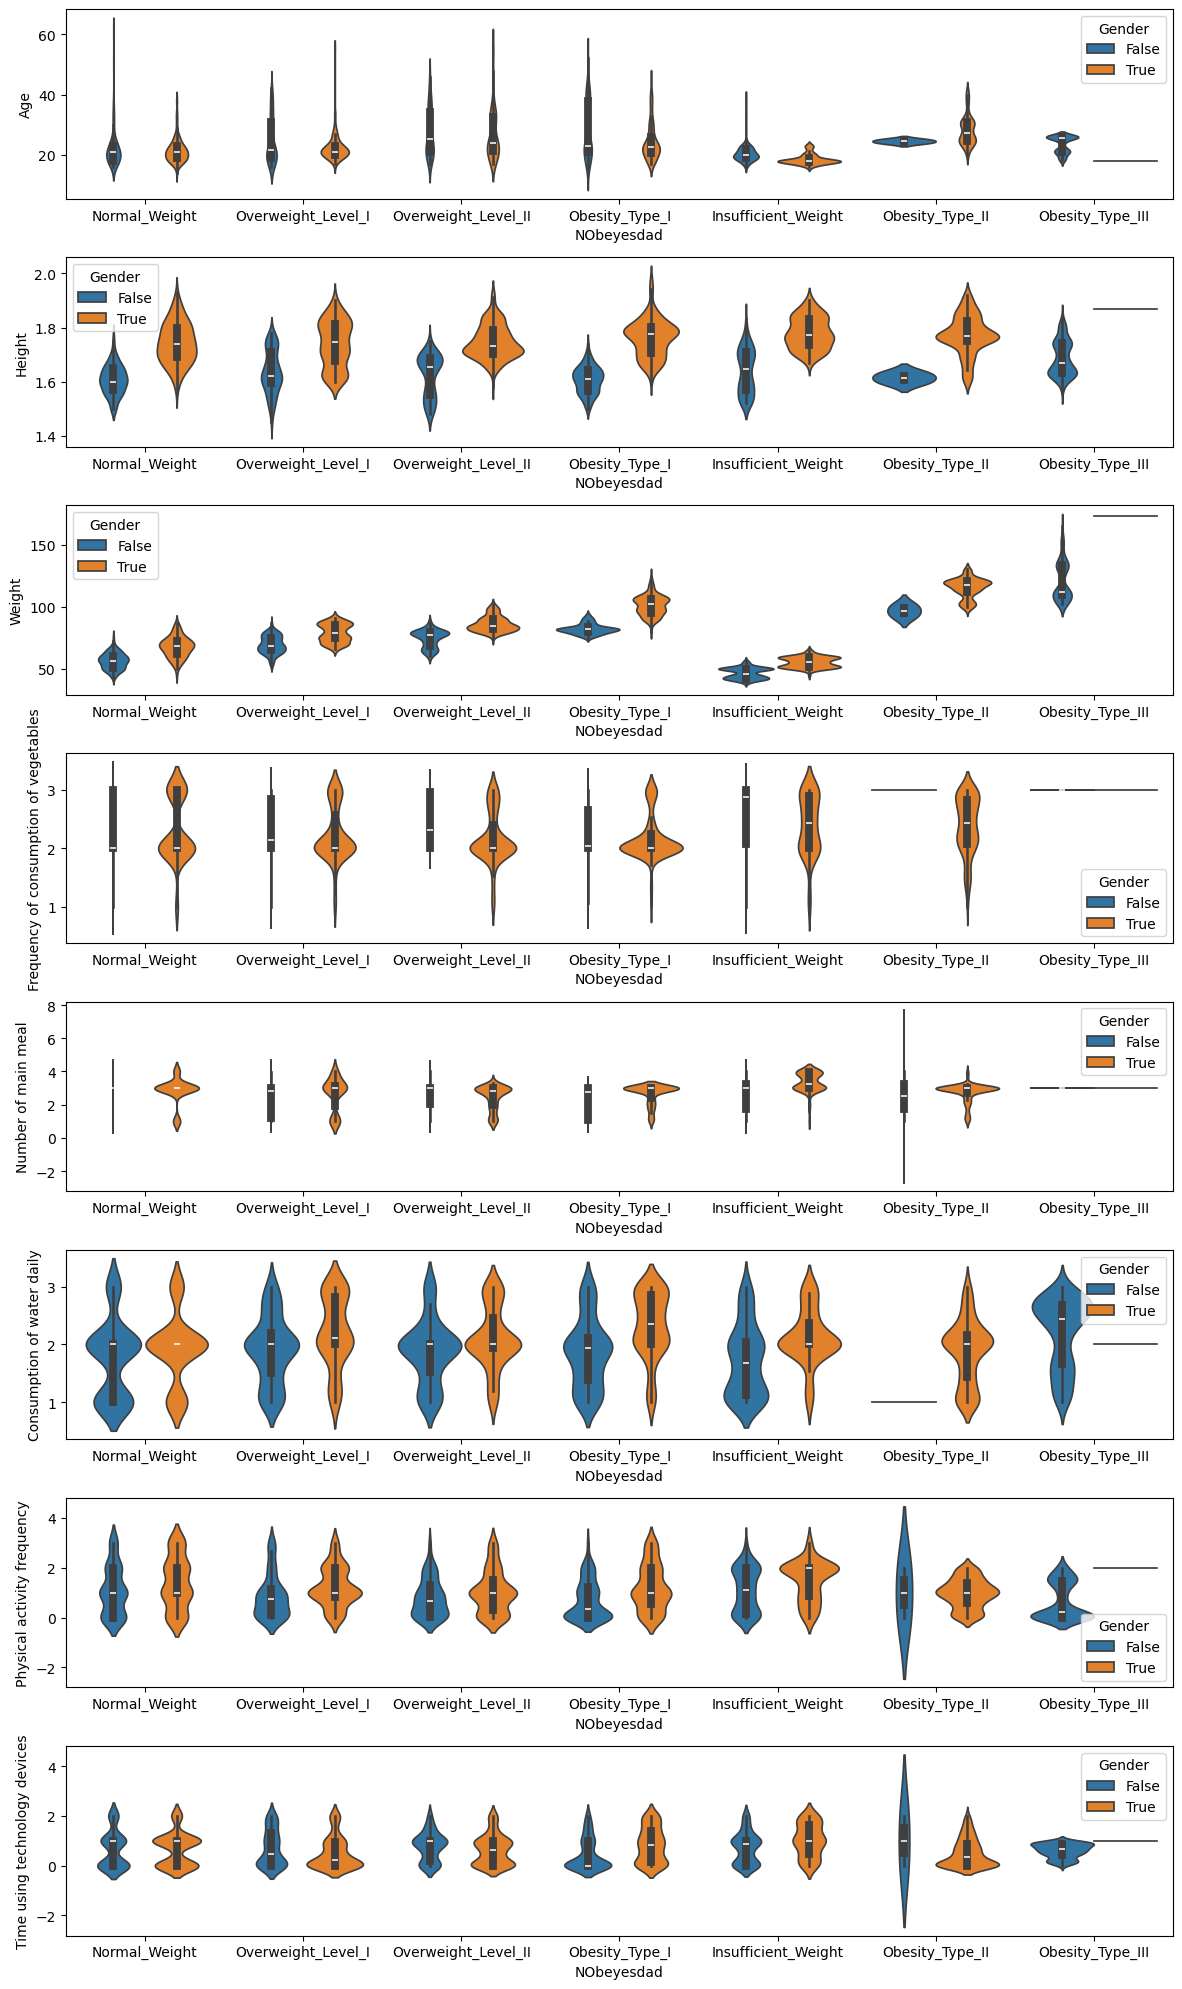

In [266]:
fig,axs = plt.subplots(len(num_cols),1,figsize=(12,len(num_cols)*2.5),sharex=False)
for i, col in enumerate(num_cols):
    sns.violinplot(x=TARGET, y=col,hue="Gender", data=train_dataset,ax = axs[i], split=False)
    # sns.scatterplot(x=TARGET, y=col, hue='Gender', data=train_dataset, ax=axs[i])
    if col in full_form.keys():
        axs[i].set_ylabel(full_form[col])

plt.tight_layout()
plt.show()

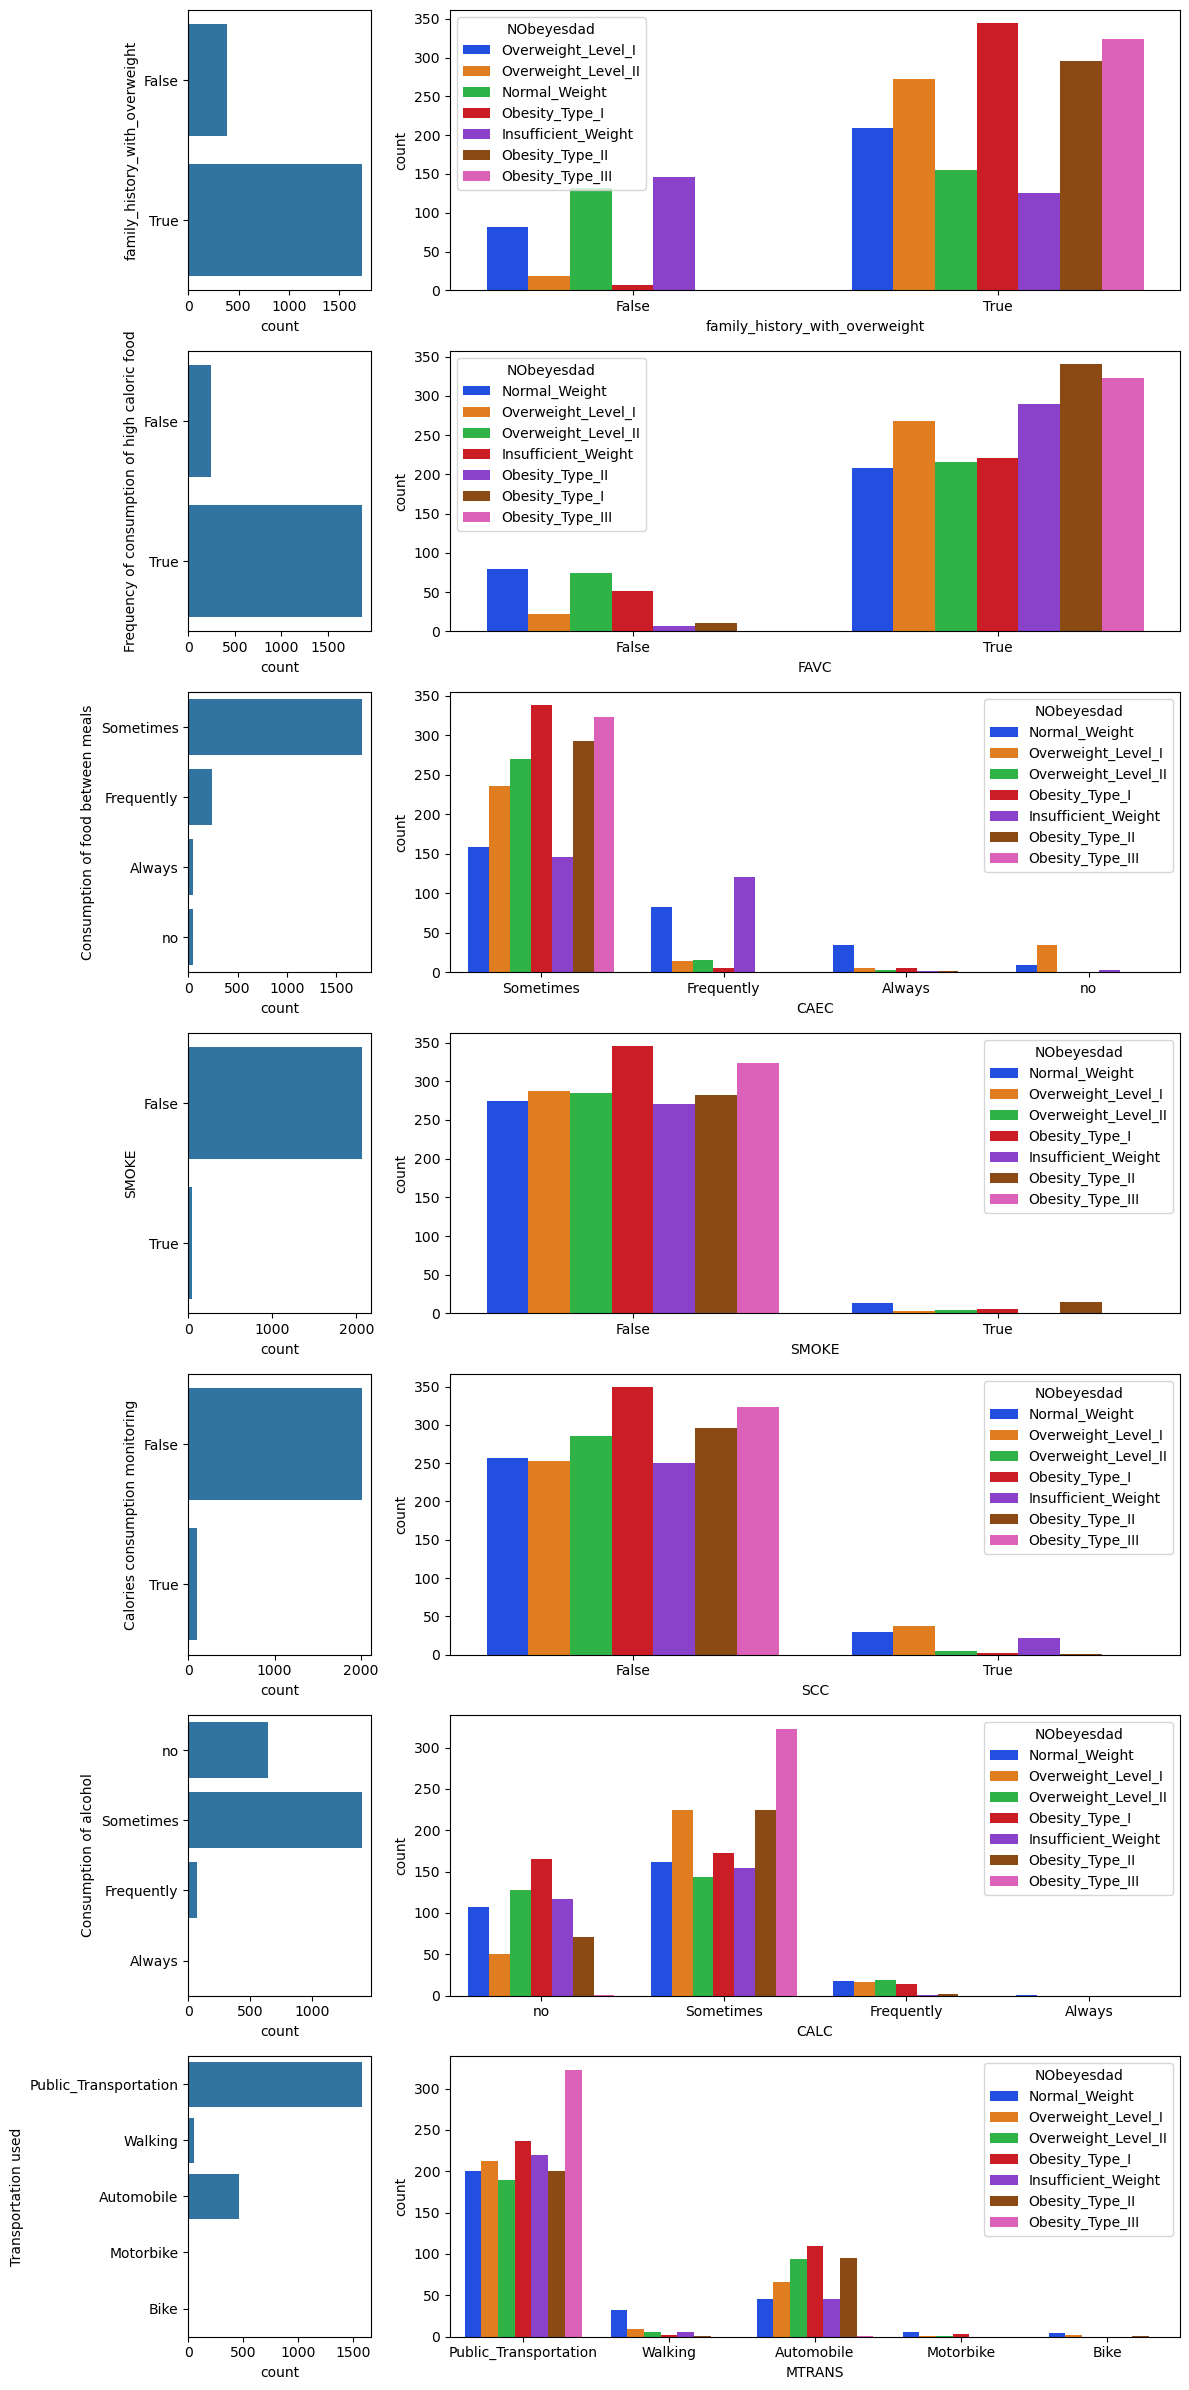

In [267]:
_,axs = plt.subplots(int(len(cat_cols)-1),2,figsize=(12,len(cat_cols)*3),width_ratios=[1, 4])
for i,col in enumerate(cat_cols[1:]):
    sns.countplot(y=col,data=train_dataset,ax=axs[i,0])
    sns.countplot(x=col,data=train_dataset,hue=TARGET,palette="bright",ax=axs[i,1])
    if col in full_form.keys():
        axs[i,0].set_ylabel(full_form[col])


plt.tight_layout()
plt.show()

# Feature Engineering

### BMI (Body Mass Index)

In [268]:
train_dataset["BMI"] = train_dataset["Weight"]/(train_dataset["Height"])**2

### WIR (Water Intake Ratio)

In [269]:
train_dataset["WIR"] = train_dataset["Weight"]/train_dataset["CH2O"]

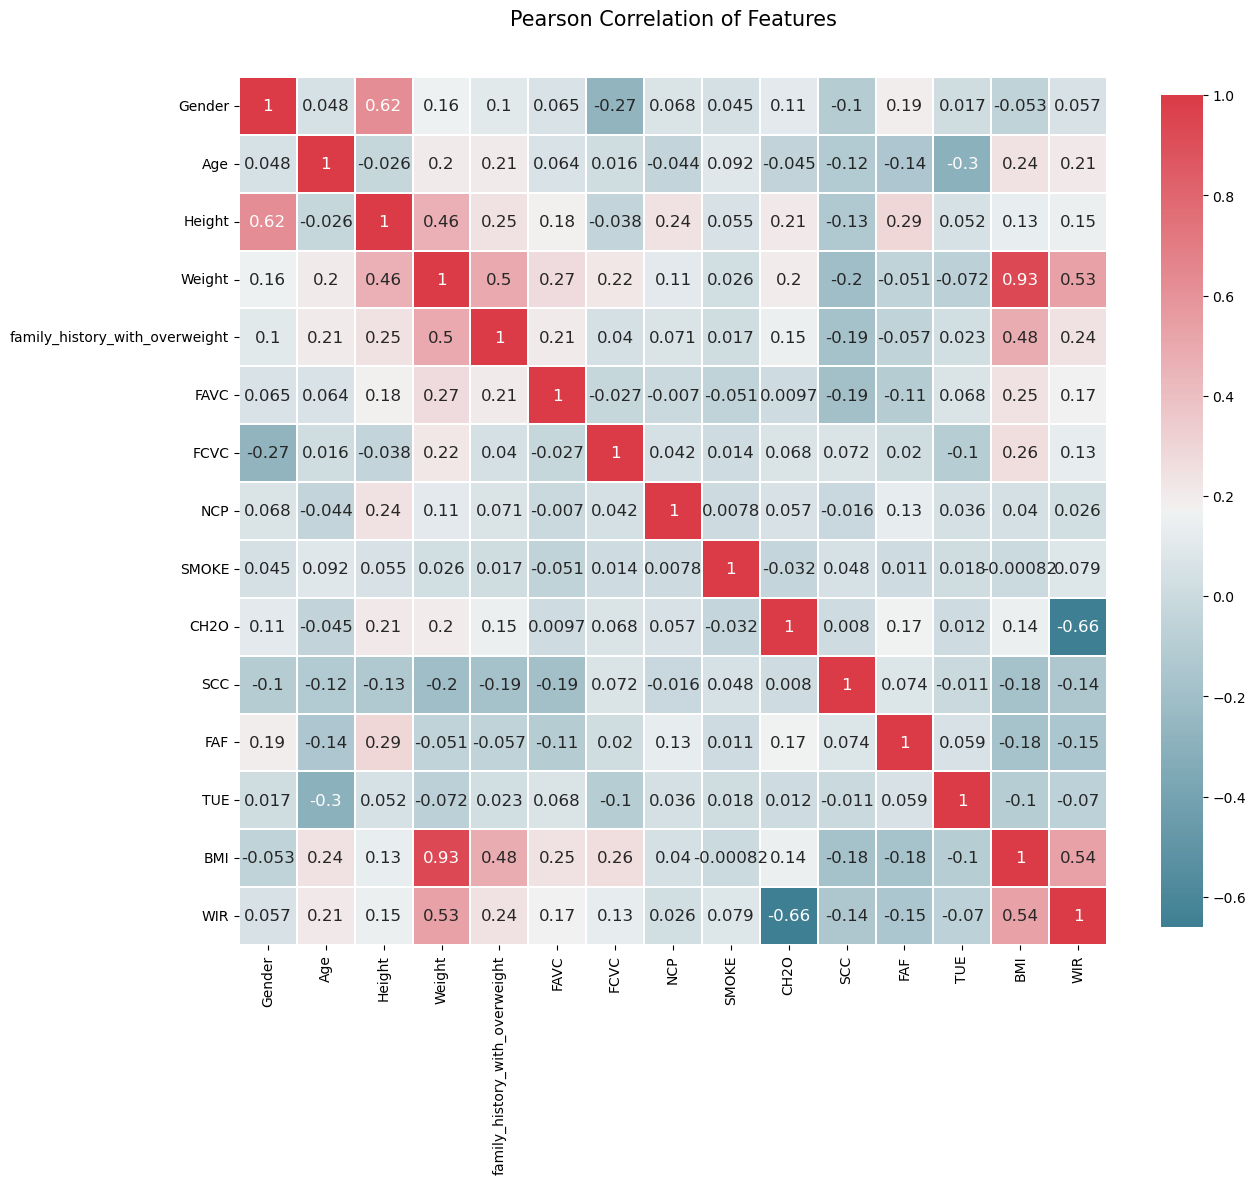

In [270]:
train_corr = train_dataset.drop(["CAEC","CALC","MTRANS","NObeyesdad"], inplace= False, axis= 1)
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_corr)

Weight and BMI have high co-relation. But keeping BMI is still useful in the model, as it not much co-related to other attributes, and adds useful information to our training model.

In [271]:
train_dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,WIR
0,False,21.0,1.62,64.0,True,False,2.0,3.0,Sometimes,False,2.0,False,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,32.000000
1,False,21.0,1.52,56.0,True,False,3.0,3.0,Sometimes,True,3.0,True,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,18.666667
2,True,23.0,1.80,77.0,True,False,2.0,3.0,Sometimes,False,2.0,False,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,38.500000
3,True,27.0,1.80,87.0,False,False,3.0,3.0,Sometimes,False,2.0,False,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,43.500000
4,True,22.0,1.78,89.8,False,False,2.0,1.0,Sometimes,False,2.0,False,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,44.900000


# Preprocessing

In [272]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

I assigned ordered weights in increasing order of frequency for 'CAEC', and 'CALC' attribues. This gave slightly better accuracy in cross validation. 

In [273]:
wt_map = { 'Insufficient_Weight' : 0,'Normal_Weight': 1,'Overweight_Level_I' : 2,'Overweight_Level_II':3 ,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6}
rev_wt_map = {}
for k,v in wt_map.items():
    rev_wt_map[v] = k

CAEC_wt ={'Sometimes' : 1, 'Frequently' : 2, 'no' : 0, 'Always' : 3}
CALC_wt = {'Sometimes' : 1, 'no' : 0, 'Frequently' : 2,  'Always' : 3}

# encoder = OrdinalEncoder()
# encoder.fit(train_dataset[['CAEC']])
# train_dataset['CAEC'] = encoder.transform(train_dataset[['CAEC']])
train_dataset['CAEC'] = train_dataset[['CAEC']].apply(lambda x: x.map(CAEC_wt))


# encoder = OrdinalEncoder()
# encoder.fit(train_dataset[['CALC']])
# train_dataset['CALC'] = encoder.transform(train_dataset[['CALC']])
train_dataset['CALC'] = train_dataset[['CALC']].apply(lambda x: x.map(CAEC_wt))



encoder = OrdinalEncoder()
encoder.fit(train_dataset[['MTRANS']])
train_dataset['MTRANS'] = encoder.transform(train_dataset[['MTRANS']])



train_dataset['NObeyesdad'] = train_dataset[['NObeyesdad']].apply(lambda x: x.map(wt_map))

train_dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,WIR
0,False,21.0,1.62,64.0,True,False,2.0,3.0,1,False,2.0,False,0.0,1.0,0,3.0,1,24.386526,32.000000
1,False,21.0,1.52,56.0,True,False,3.0,3.0,1,True,3.0,True,3.0,0.0,1,3.0,1,24.238227,18.666667
2,True,23.0,1.80,77.0,True,False,2.0,3.0,1,False,2.0,False,2.0,1.0,2,3.0,1,23.765432,38.500000
3,True,27.0,1.80,87.0,False,False,3.0,3.0,1,False,2.0,False,2.0,0.0,2,4.0,2,26.851852,43.500000
4,True,22.0,1.78,89.8,False,False,2.0,1.0,1,False,2.0,False,0.0,0.0,1,3.0,3,28.342381,44.900000


In [274]:
train_df, test_df = train_test_split(train_dataset, test_size=0.2, random_state=42)
X_train = train_df.drop(["NObeyesdad"], axis= 1)
y_train = train_df["NObeyesdad"]
X_test = test_df.drop(["NObeyesdad"], axis= 1)
y_test = test_df["NObeyesdad"]
X_test.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,WIR
544,False,20.406871,1.755978,53.699561,True,True,2.0,3.891994,2,False,1.863930,False,2.870127,2.000000,0,3.0,17.415366,28.809859
1987,False,26.000000,1.624950,111.004920,True,True,3.0,3.000000,1,False,2.704315,False,0.000000,0.322666,1,3.0,42.039953,41.047334
420,True,18.000000,1.850000,60.000000,True,True,3.0,4.000000,1,False,2.000000,True,2.000000,0.000000,1,0.0,17.531045,30.000000
527,False,21.000000,1.520000,42.000000,False,True,3.0,1.000000,2,False,1.000000,False,0.000000,0.000000,1,3.0,18.178670,42.000000
196,True,22.000000,1.750000,74.000000,True,False,2.0,3.000000,1,False,2.000000,False,1.000000,2.000000,1,1.0,24.163265,37.000000


# Models

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_score, accuracy_score
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [276]:
y_test = [rev_wt_map[i] for i in y_test]

### Random Forest Classifier

In [277]:
model = RandomForestClassifier()

scores = cross_val_score(model, train_dataset.drop(["NObeyesdad"], inplace = False, axis = 1) , train_dataset["NObeyesdad"], cv=5, scoring='accuracy')
print ("Cross validation Score", sum(scores)/len(scores))


Cross validation Score 0.9796544653961211


In [278]:
model = RandomForestClassifier()

model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions = [rev_wt_map[i] for i in predictions]
print(classification_report(y_test, predictions))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        56
      Normal_Weight       0.98      1.00      0.99        62
     Obesity_Type_I       1.00      0.99      0.99        78
    Obesity_Type_II       0.98      1.00      0.99        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       1.00      1.00      1.00        56
Overweight_Level_II       1.00      1.00      1.00        50

           accuracy                           1.00       423
          macro avg       1.00      1.00      1.00       423
       weighted avg       1.00      1.00      1.00       423



### KNN

In [279]:
model = KNeighborsClassifier()

scores = cross_val_score(model, train_dataset.drop(["NObeyesdad"], inplace = False, axis = 1) , train_dataset["NObeyesdad"], cv=5, scoring='accuracy')
print ("Cross validation Score", sum(scores)/len(scores))


Cross validation Score 0.8962779962578289


In [280]:
model = KNeighborsClassifier()

model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions = [rev_wt_map[i] for i in predictions]
print(classification_report(y_test, predictions))

                     precision    recall  f1-score   support

Insufficient_Weight       0.88      1.00      0.93        56
      Normal_Weight       0.88      0.68      0.76        62
     Obesity_Type_I       0.95      0.94      0.94        78
    Obesity_Type_II       0.95      0.95      0.95        58
   Obesity_Type_III       0.95      1.00      0.98        63
 Overweight_Level_I       0.78      0.80      0.79        56
Overweight_Level_II       0.85      0.88      0.86        50

           accuracy                           0.89       423
          macro avg       0.89      0.89      0.89       423
       weighted avg       0.89      0.89      0.89       423



### LGBM

In [281]:
model = LGBMClassifier()

scores = cross_val_score(model, train_dataset.drop(["NObeyesdad"], inplace = False, axis = 1) , train_dataset["NObeyesdad"], cv=5, scoring='accuracy')
print ("Cross validation Score", sum(scores)/len(scores))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2572
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 18
[LightGBM] [Info] Start training from score -2.046805
[LightGBM] [Info] Start training from score -1.997578
[LightGBM] [Info] Start training from score -1.984562
[LightGBM] [Info] Start training from score -1.984562
[LightGBM] [Info] Start training from score -1.792945
[LightGBM] [Info] Start training from score -1.963240
[LightGBM] [Info] Start training from score -1.874472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [282]:
model = LGBMClassifier()

model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions = [rev_wt_map[i] for i in predictions]
print(classification_report(y_test, predictions))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2573
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 18
[LightGBM] [Info] Start training from score -2.056021
[LightGBM] [Info] Start training from score -2.015199
[LightGBM] [Info] Start training from score -1.975979
[LightGBM] [Info] Start training from score -1.950661
[LightGBM] [Info] Start training from score -1.821828
[LightGBM] [Info] Start training from score -1.954836
[LightGBM] [Info] Start training from score -1.866779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

### XGB Classifier

In [283]:
model = XGBClassifier()

scores = cross_val_score(model, train_dataset.drop(["NObeyesdad"], inplace = False, axis = 1) , train_dataset["NObeyesdad"], cv=5, scoring='accuracy')
print ("Cross validation Score", sum(scores)/len(scores))


Cross validation Score 0.9753767380368167


In [284]:
model = XGBClassifier()

model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions = [rev_wt_map[i] for i in predictions]
print(classification_report(y_test, predictions))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.94      1.00      0.97        62
     Obesity_Type_I       1.00      0.97      0.99        78
    Obesity_Type_II       0.97      1.00      0.98        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       1.00      0.93      0.96        56
Overweight_Level_II       0.96      1.00      0.98        50

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

